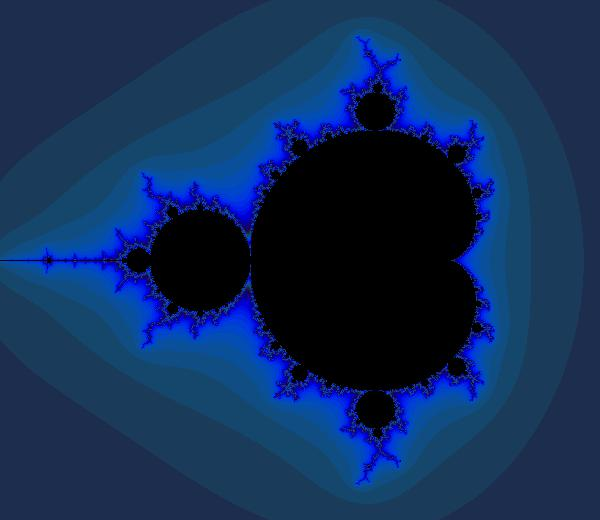

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 18 16:36:55 2017

@author: sl169
"""

# 导入仿真库
import tensorflow as tf
import numpy as np
# 导入可视化库
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display
import scipy.ndimage as nd
import matplotlib.pyplot as plt

def DisplayFractal(a, fmt='jpeg'):
    """显示迭代计算出的彩色分形图像。"""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
                          30+50*np.sin(a_cyclic),
                          155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

sess = tf.InteractiveSession()
# 使用NumPy创建一个在[-2,2]x[-2,2]范围内的2维复数数组
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

xs = tf.constant(Z.astype("complex64"))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, "float32"))

tf.global_variables_initializer().run()

# 计算一个新值z: z^2 + x
zs_ = zs*zs + xs
# 这个新值会发散吗？
not_diverged = tf.abs(zs_) < 4
# 更新zs并且迭代计算。
#
# 说明：在这些值发散之后，我们仍然在计算zs，这个计算消耗特别大！
# 如果稍微简单点，这里有更好的方法来处理。
#
step = tf.group(zs.assign(zs_),ns.assign_add(tf.cast(not_diverged, "float32")))

for i in range(200): step.run()

DisplayFractal(ns.eval())